In [1]:
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal


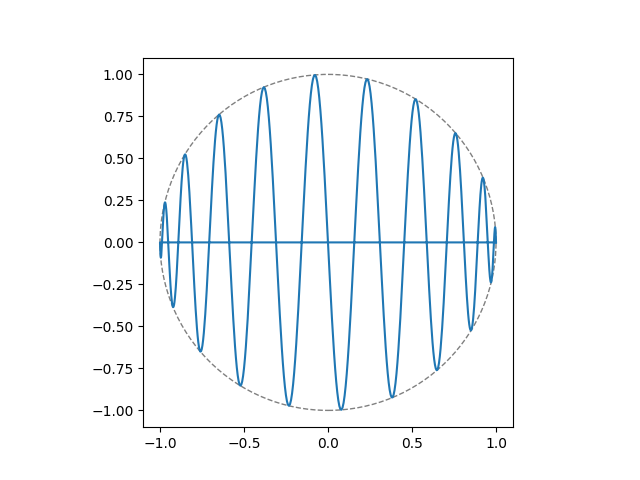

In [2]:
# Sine wave inscribed in a circle
plt.style.use('default')
fig, ax = plt.subplots()
ax.set_aspect(1)
t = np.linspace(0, 2*np.pi, 1000)
x = np.cos(t)
y = np.sin(t) * np.sin(20*t) * 0.5 * (1 + signal.square(t))
ax.add_patch(mpl.patches.Circle((0,0), 1, fc='none', ec='0.5', ls='--'))
plt.plot(x, y)
# plt.savefig('circle-sine.png')
plt.show()


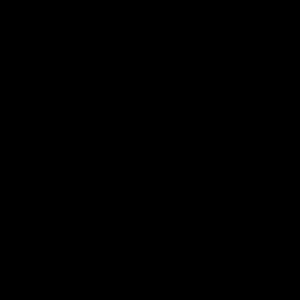

In [3]:
# Spherical spring

from vectorscope import VectorScope

nsamp = 2000
t = np.linspace(0, 2*np.pi, nsamp)

# Y-axis rotation
fy = 0.005
yph = None

# Offset for z-axis rotation, to orbit instead of spinning in place
zroff = 0.4
# Z-axis rotation
fz = 0.005
zph = None

def get_data(fnum):
    # The actual math: two quadrature sine waves (`circ` and `fill`)
    # along with a quadrature sine wave each for y-axis and z-axis rotation.
    # Also a square wave to cut off the "retrace" to avoid a crowded mess
    # when the sphere envelope sine wave goes into its negative half-cycle.

    th = t + 2*np.pi * fnum

    # Fundamental frequency (excluding slow rotations)
    f0 = 1.00
    # Frequency of "fill" waveform
    f = 20 * f0
    # Use discrete rotation steps, so the figure closes during each frame
    global yph
    if yph is None:
        yph = 2*np.pi * fy * fnum
    else:
        yph += 2*np.pi * fy
    yrot = np.exp(1j*yph)
    # Outer circle of sphere to create an envelope
    circ = np.exp(1j*f0*th)
    # Modulate x-axis to get y-axis rotation
    circ.real *= yrot.real
    # "Fill" waveform, modulated by sphere envelope
    fill = np.exp(1j*f*th) * circ.imag
    # Modulate x-axis to get y-axis rotation
    fill.real *= yrot.imag
    # Replace the above line with the following to see a failed attempt
    # fill.real *= yrot.real
    # Offset of square wave
    sqo = 0.5
    # Square wave to cut off "retrace"
    sq = sqo + (1 - sqo) * signal.square(f0*th)
    z = fill * sq + circ.real
    # Use discrete rotation steps, so the figure closes during each frame
    global zph
    if zph is None:
        zph = 2*np.pi * fz * fnum
    else:
        zph += 2*np.pi * fz
    zrot = np.exp(1j*zph)
    z = zrot*(zroff + (1 - zroff) * z)
    return (z.real, z.imag)

anim = VectorScope(get_data, ncycles=2)
# anim.save('boing-opt.gif', dpi=100, extra_args=['-filter_complex','split[a][b];[a] palettegen=max_colors=16 [p];[b][p] paletteuse'])
# anim.save('boing.gif')
# anim.save('boing.mp4')
plt.show()

# Comment out the plt.show() and uncomment the following to embed the
# animation in a Jupyter notebook

# plt.close()
# from IPython.display import HTML
# HTML(anim.to_jshtml())


In [4]:
import ipywidgets as widgets
from IPython.display import display
btns = widgets.ToggleButtons(options=['Stop','Run'], value='Run')
def cb(x):
    if x['new'] == 'Stop':
        anim.anim.pause()
    else:
        anim.anim.resume()
btns.observe(cb, names='value')
fy_slider = widgets.FloatSlider(description='y-rot speed:',
                                value=fy, min=0., max=0.1, step=.001, orientation='horizontal',
                                readout=True, readout_format='.3f', continuous_update=True)

def fy_cb(x):
    global fy
    fy = x['new']

fy_slider.observe(fy_cb, names='value')

fz_slider = widgets.FloatSlider(description='z-rot speed:',
                                value=fz, min=0., max=0.1, step=.001, orientation='horizontal',
                                readout=True, readout_format='.3f', continuous_update=True)

def fz_cb(x):
    global fz
    fz = x['new']

fz_slider.observe(fz_cb, names='value')
zrot_slider = widgets.FloatSlider(description='z-rot offset:',
                                  value=zroff, min=0., max=1.0, step=.01, orientation='horizontal',
                                  readout=True, readout_format='.2f', continuous_update=True)
def zrot_cb(x):
    global zroff
    zroff = x['new']
zrot_slider.observe(zrot_cb, names='value')
display(btns, fy_slider, fz_slider, zrot_slider)

ToggleButtons(index=1, options=('Stop', 'Run'), value='Run')

FloatSlider(value=0.005, description='y-rot speed:', max=0.1, readout_format='.3f', step=0.001)

FloatSlider(value=0.005, description='z-rot speed:', max=0.1, readout_format='.3f', step=0.001)

FloatSlider(value=0.4, description='z-rot offset:', max=1.0, step=0.01)